In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.formula.api as sm

In [2]:
#input_path = 'C:\\Users\\Jackie\\Desktop\\20181025_PredictDiseaseSpread\\Data\\'
input_path = 'C:\\Users\\CHANJA8\\OneDrive - Orient Overseas Container Line Ltd\\Projects\\Personal\\PredictDiseaseSpread\\Data\\'

In [3]:
raw_df = pd.read_csv(input_path + 'dengue_features_train.csv')
raw_df.fillna(0, inplace=True)
raw_label = pd.read_csv(input_path + 'dengue_labels_train.csv')

In [4]:
raw_df.year = raw_df.year.astype(str)
raw_df.weekofyear  = raw_df.weekofyear.astype(str)
raw_df.week_start_date = raw_df.week_start_date.str.replace('-', '')

In [5]:
labelencoder_X = LabelEncoder()
raw_df.iloc[:, 0] = labelencoder_X.fit_transform(raw_df.iloc[:, 0])
raw_df.iloc[:, 1] = labelencoder_X.fit_transform(raw_df.iloc[:, 1])
raw_df.iloc[:, 2] = labelencoder_X.fit_transform(raw_df.iloc[:, 2])
raw_df.iloc[:, 3] = labelencoder_X.fit_transform(raw_df.iloc[:, 3])
onehotencoder = OneHotEncoder(categorical_features = [0, 1, 2, 3])
raw_df = onehotencoder.fit_transform(raw_df).toarray()

In [6]:
# Feature Scaling
sc_X = StandardScaler()
raw_df = sc_X.fit_transform(raw_df)

In [8]:
X, X_test, y, y_test = train_test_split(raw_df, raw_label, test_size=0.2, random_state=18)

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=18)

In [10]:
y_train = y_train.total_cases
y_val = y_val.total_cases
y_test = y_test.total_cases

In [11]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
regressor.coef_

array([-5.58755060e+13, -5.58755060e+13, -1.63594031e+14, ...,
        6.08984375e+00,  5.96484375e+00, -9.76562500e-01])

In [12]:
y_pred = regressor.predict(X_val)

Text(0, 0.5, 'Predicted Values')

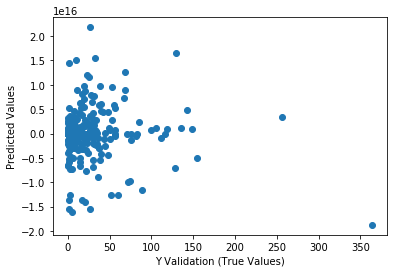

In [26]:
plt.scatter(y_val, y_pred)
plt.xlabel("Y Validation (True Values)")
plt.ylabel("Predicted Values")

In [28]:
print('MAE', metrics.mean_absolute_error(y_val, y_pred))
print('MSE', metrics.mean_squared_error(y_val, y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))

MAE 2795562505521445.0
MSE 2.352816109998171e+31
RMSE 4850583583444544.0


In [29]:
# R-Square
metrics.explained_variance_score(y_val, y_pred)

-1.7276448516613507e+28

In [35]:
""" 
Summary of applying simple algorithm

1. used all the features
2. used OneHotEncoding to encode the categorical variables
3. used Linear Regression
4. MAE, MSE, RMSE are extremely large
5. R-square is negative
6. Very very poor performance

"""

' Summary of applying simple algorithm\n\n1. used all the features\n2. used OneHotEncoding to encode the categorical variables\n3. used Linear Regression\n4. MAE, MSE, RMSE are extremely large\n5. R-square is negative\n6. Very very poor performance\n\n'

In [21]:
# # Building the optimal model using backward elimination

# # Adding X0 ( = 1) to the dataset
# X_train_2 = np.append(arr=np.ones((1456, 1)).astype(int), values=X_train, axis=1)
# X_train_opt = X_train_2[:, [0, 1, 2, 3...]]
# regressor_OLS = sm.OLS(endog=y_train, exog=X_train_opt).fit()
# regressor_OLS.summary()


In [3]:
# Merge the train set and label set into one dataframe for ETA

df = pd.read_csv(input_path + 'dengue_features_train.csv')
df.fillna(0, inplace=True)

label = pd.read_csv(input_path + 'dengue_labels_train.csv')
y = label[['total_cases']]

full_df = pd.merge(df, y, left_index=True, right_index=True)

full_df.to_csv(input_path + "full_df.csv", index=False)

In [8]:
full_df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [12]:
# full dataframe of San Juan
sj = full_df.loc[full_df.city == 'sj']

In [14]:
# full dataframe of Iquitos
iq = full_df.loc[full_df.city == 'iq']

In [20]:
#  Mean cases by year of San Juan
sj.groupby(['year'])['total_cases'].agg('sum').mean()

1683.842105263158

In [21]:
#  Mean cases by year of Iquitos
iq.groupby(['year'])['total_cases'].agg('sum').mean()

357.6363636363636

In [36]:
#  Mean cases by year of Iquitos, excluding 2000 and 2001
iq_sub = iq.loc[(iq.year != 2000) & (iq.year != 2001)]
iq_sub.groupby(['year'])['total_cases'].agg('sum').mean()

435.1111111111111

In [34]:
len(iq_sub)

442

In [35]:
len(iq)

520